In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for market basket analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv("dataset_group.csv")
data.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [3]:
data.shape

(20641, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,20641,603,08-02-2019,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641,NaN,NaN,NaN,575.986,328.557,1,292,581,862,1139
Product,20641,37,poultry,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.duplicated().sum()

4730

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20636     True
20637    False
20638    False
20639    False
20640    False
Length: 20641, dtype: bool

In [8]:
data.shape

(20641, 3)

In [9]:
data.to_excel("data.xlsx")

In [10]:
data['Product'] = data['Product'].str.lower()

In [11]:
data.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [12]:
data = data.drop(data[data.Product == 'none'].index)

In [13]:
data

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


Text(0.5, 1.0, 'frequency of most popular products')

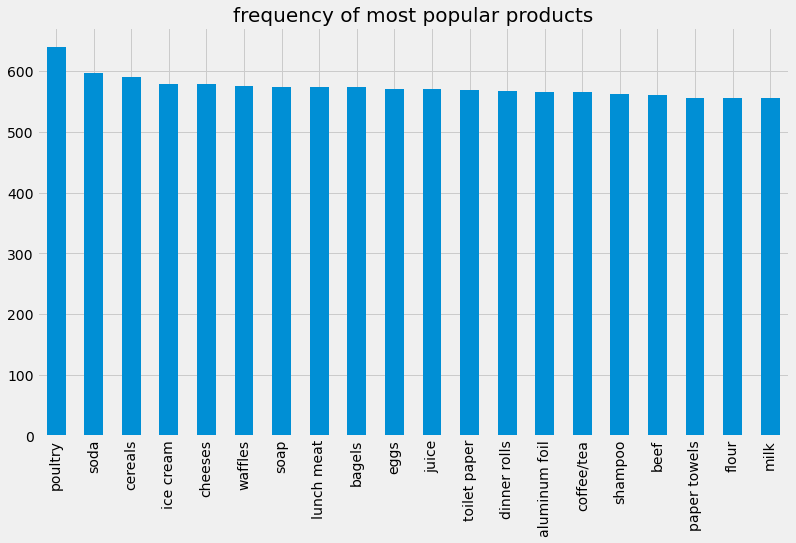

In [14]:
data['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));
plt.title('frequency of most popular products', fontsize = 20)

In [15]:
data["Product"].value_counts().head(15)

poultry          640
soda             597
cereals          591
ice cream        579
cheeses          578
waffles          575
soap             574
lunch meat       573
bagels           573
eggs             570
juice            570
toilet paper     569
dinner rolls     567
aluminum foil    566
coffee/tea       565
Name: Product, dtype: int64

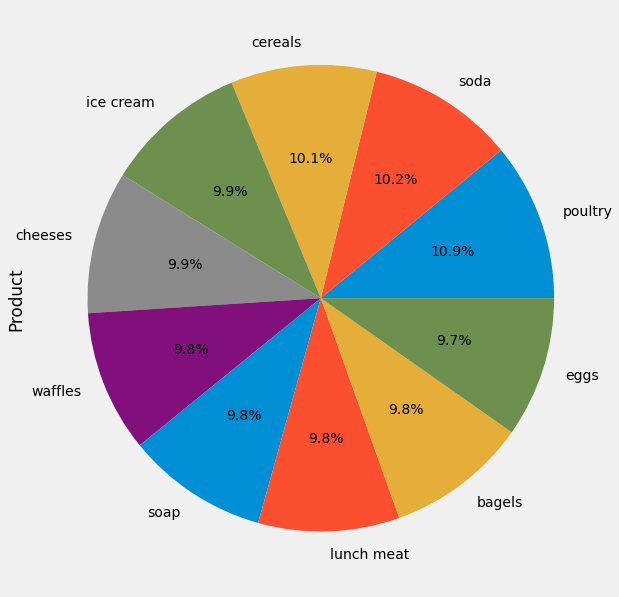

In [16]:
# Pie Chart
plt.figure(1, figsize=(10,10))
data['Product'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.show()

In [17]:
#The best-selling products and the values of these products let us draw.

In [18]:
itemNames = data['Product'].value_counts().index
itemValues = data['Product'].value_counts().values

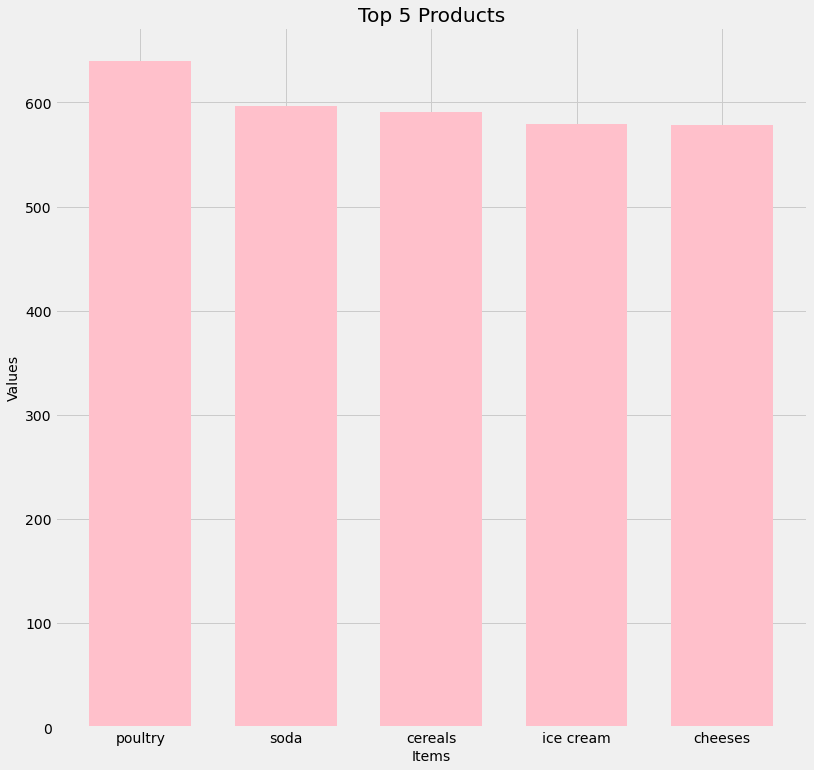

In [19]:
plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Top 5 Products')
plt.bar(itemNames[:5],itemValues[:5], width = 0.7, color="pink",linewidth=0.4)
plt.show()

In [20]:
data['datetime'] = pd.to_datetime(data['Date'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['weekday'] = data['datetime'].dt.weekday
#data['hour'] = data['datetime'].dt.hour
#data = data.drop(['Date'], axis=1)


In [21]:
data.tail(15)

,Date,Order_id,Product,datetime,year,month,day,weekday
20626,25-02-2020,1138,yogurt,2020-02-25,2020,2,25,1
20627,25-02-2020,1138,beef,2020-02-25,2020,2,25,1
20628,25-02-2020,1138,waffles,2020-02-25,2020,2,25,1
20629,25-02-2020,1138,sugar,2020-02-25,2020,2,25,1
20630,25-02-2020,1138,spaghetti sauce,2020-02-25,2020,2,25,1
20631,25-02-2020,1138,all- purpose,2020-02-25,2020,2,25,1
20632,25-02-2020,1138,sandwich bags,2020-02-25,2020,2,25,1
20633,25-02-2020,1138,toilet paper,2020-02-25,2020,2,25,1
20634,25-02-2020,1138,soda,2020-02-25,2020,2,25,1
20635,25-02-2020,1138,soda,2020-02-25,2020,2,25,1


Text(0.5, 1.0, 'Yearly sales')

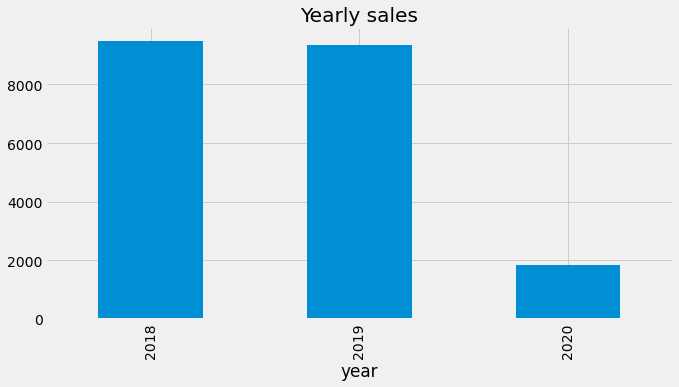

In [22]:
yearlyTable = data['year'].value_counts().plot(kind='bar',figsize=(10,5))
yearlyTable.set_xlabel("year")
data['year'].value_counts().head()
plt.title('Yearly sales')

In [23]:
data.year.value_counts()

2018    9479
2019    9333
2020    1829
Name: year, dtype: int64

Text(0.5, 1.0, 'monthly sales')

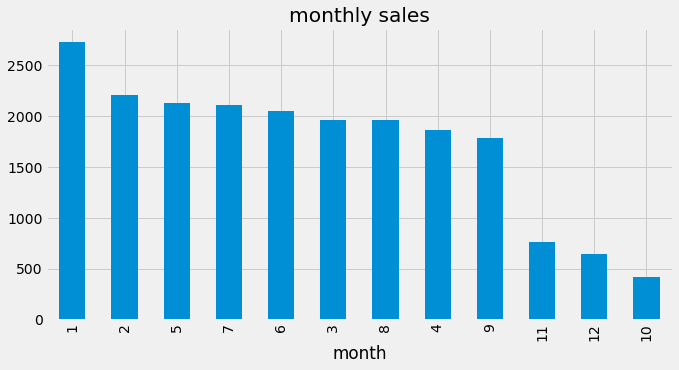

In [24]:
monthlyTable = data['month'].value_counts().plot(kind='bar',figsize=(10,5))
monthlyTable.set_xlabel("month")
data['month'].value_counts().head()
plt.title('monthly sales')

In [25]:
data.month.value_counts()

1     2732
2     2210
5     2131
7     2115
6     2054
3     1966
8     1963
4     1861
9     1786
11     760
12     649
10     414
Name: month, dtype: int64

Text(0.5, 1.0, 'daily sales')

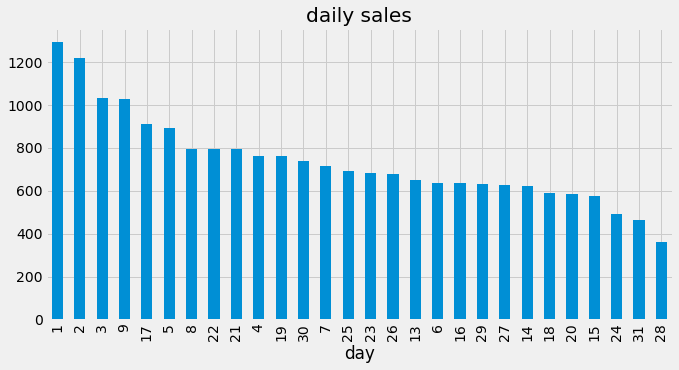

In [26]:
dayTable = data['day'].value_counts().plot(kind='bar',figsize=(10,5))
dayTable.set_xlabel("day")
data['day'].value_counts().head()
plt.title('daily sales')

In [27]:
data.day.value_counts()

1     1293
2     1216
3     1030
9     1028
17     910
5      892
8      793
22     793
21     792
4      761
19     761
30     739
7      715
25     690
23     680
26     676
13     652
6      637
16     635
29     630
27     628
14     624
18     591
20     583
15     576
24     490
31     463
28     363
Name: day, dtype: int64

Text(0.5, 1.0, 'weekday sales')

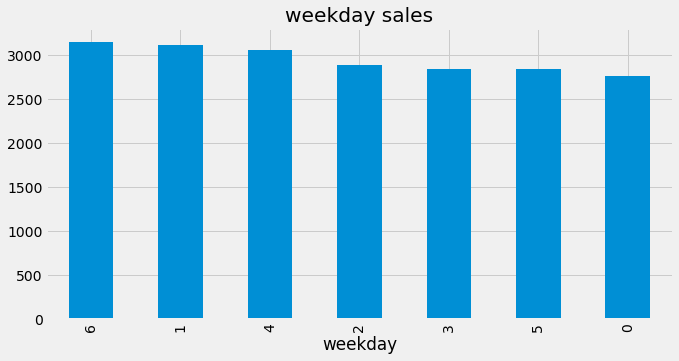

In [28]:
weekdayTable = data['weekday'].value_counts().plot(kind='bar',figsize=(10,5))
weekdayTable.set_xlabel("weekday")
data['weekday'].value_counts().head()
plt.title('weekday sales')

In [29]:
data.weekday.value_counts()

6    3147
1    3115
4    3048
2    2888
3    2840
5    2839
0    2764
Name: weekday, dtype: int64

In [30]:
data['monthly'] = pd.to_datetime(data['datetime']).dt.to_period('M')
monthly_orders = data[['monthly','Order_id', 'Product']].groupby(['monthly', 'Product'], as_index=False).count().sort_values(by='monthly')
monthly_orders.set_index('monthly' ,inplace=True)

monthly_orders.head(20)

,Product,Order_id
monthly,,
2018-01,all- purpose,33
2018-01,mixes,30
2018-01,paper towels,21
2018-01,pasta,26
2018-01,pork,30
2018-01,poultry,30
2018-01,sandwich bags,25
2018-01,shampoo,42
2018-01,soap,31


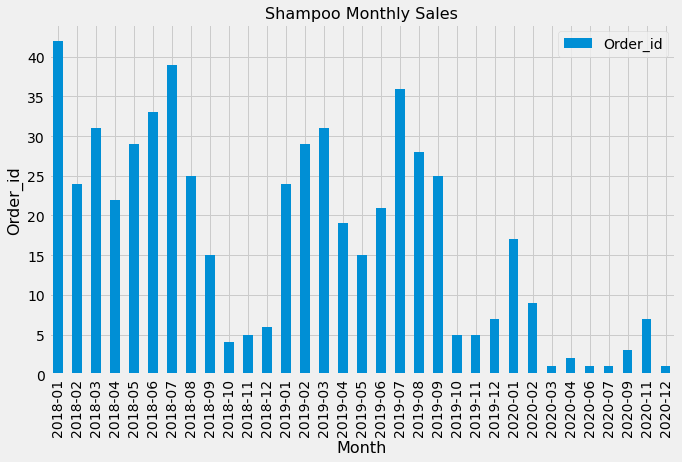

In [31]:
Shampoo_Sales_Monthly = monthly_orders[monthly_orders['Product']=='shampoo'].plot(kind='bar', figsize=(10,6))
Shampoo_Sales_Monthly.set_xlabel("Shampoo Monthly Sales")

plt.ylabel('Order_id', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.title("Shampoo Monthly Sales", fontsize=16);


In [32]:
data['yearly'] = pd.to_datetime(data['datetime']).dt.to_period('Y')
yearly_orders = data[['yearly','Order_id', 'Product']].groupby(['yearly', 'Product'], as_index=False).count().sort_values(by='yearly')
yearly_orders.set_index('yearly' ,inplace=True)

yearly_orders.head(20)

,Product,Order_id
yearly,,
2018,all- purpose,248
2018,mixes,266
2018,paper towels,235
2018,pasta,265
2018,pork,239
2018,poultry,287
2018,sandwich bags,247
2018,shampoo,275
2018,soap,260


In [33]:
data.Product.value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
lunch meat                      573
bagels                          573
eggs                            570
juice                           570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
all- purpose                    551
dishwashing liquid/detergent    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

In [34]:
y = data.Product.value_counts().head(50).to_frame()
y.index

Index(['poultry', 'soda', 'cereals', 'ice cream', 'cheeses', 'waffles', 'soap',
       'lunch meat', 'bagels', 'eggs', 'juice', 'toilet paper', 'dinner rolls',
       'aluminum foil', 'coffee/tea', 'shampoo', 'beef', 'paper towels',
       'flour', 'butter', 'milk', 'mixes', 'all- purpose',
       'dishwashing liquid/detergent', 'ketchup', 'yogurt', 'individual meals',
       'tortillas', 'pasta', 'laundry detergent', 'sandwich bags',
       'spaghetti sauce', 'sugar', 'pork', 'fruits', 'sandwich loaves',
       'hand soap'],
      dtype='object')

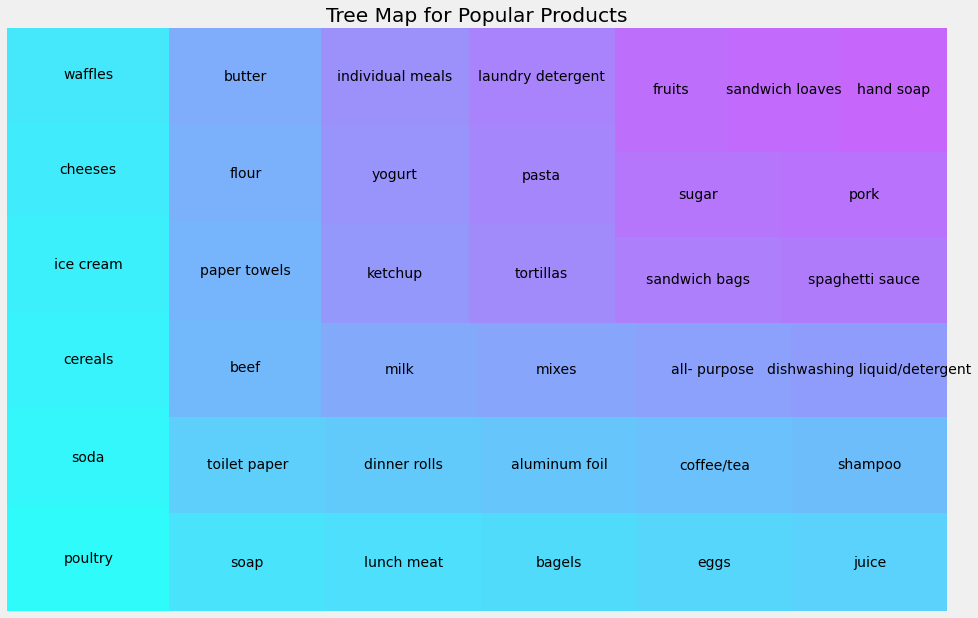

In [35]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (15,10)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Products')
plt.axis('off')
plt.show()

In [36]:
basket=data.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [37]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [38]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [39]:
basket=basket.applymap(encode_zero_one)

In [40]:
#Find the support for itemsets using Apriori

In [41]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(poultry, ice cream, dinner rolls, spaghetti s..."
8450,0.051800,"(poultry, juice, dinner rolls, spaghetti sauce)"
8451,0.053556,"(poultry, dinner rolls, spaghetti sauce, laund..."
8452,0.050044,"(poultry, laundry detergent, mixes, dishwashin..."


In [42]:
#Visualizing the Support of itemsets

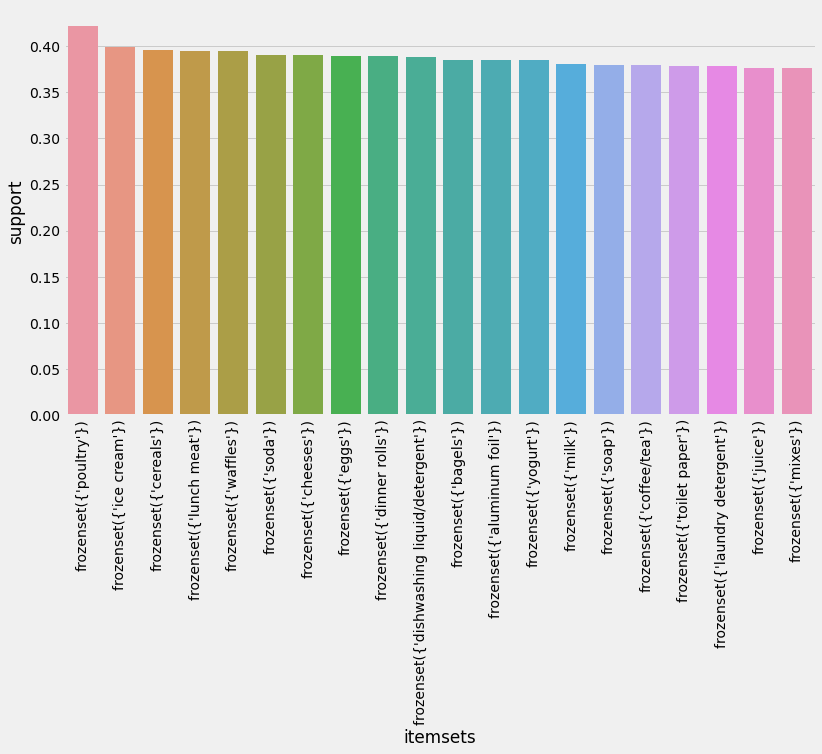

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [44]:
#Check the rules using association_rules

In [45]:
basket = association_rules(itemsets, metric ="lift") 


In [46]:
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [47]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47948,"(pasta, paper towels)","(ice cream, eggs)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47953,"(ice cream, eggs)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47949,"(pasta, ice cream)","(paper towels, eggs)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47952,"(paper towels, eggs)","(pasta, ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47853,"(paper towels, dinner rolls)","(pasta, eggs)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
47852,"(pasta, eggs)","(paper towels, dinner rolls)",0.169447,0.155399,0.051800,0.305699,1.967185,0.025468,1.216477
47908,"(poultry, spaghetti sauce)","(juice, dinner rolls)",0.171203,0.157155,0.051800,0.302564,1.925254,0.024894,1.208490
47909,"(juice, dinner rolls)","(poultry, spaghetti sauce)",0.157155,0.171203,0.051800,0.329609,1.925254,0.024894,1.236289
47798,"(cereals, sandwich bags)","(cheeses, bagels)",0.158033,0.167691,0.050922,0.322222,1.921524,0.024421,1.227997
47795,"(cheeses, bagels)","(cereals, sandwich bags)",0.167691,0.158033,0.050922,0.303665,1.921524,0.024421,1.209140


In [46]:
basket.to_csv("basket.csv")